# SOK-3011 - Finans

![Fond](img/fond.png)![Fond](img/risikojustert.png)

# Caset

* Skriv en rapport om en aksje, fond eller strategi på TITLON, og argumenter for hvorfor dette er en bra investeringscase
* I rapporten skal du bruke:
  * Teori om forventning, nytte og risiko
  * Porteføljeteori
  * Faktorer
  * Value At Risk

Det første dere begynner med, er å finne caset deres. Det trengs det ingen forkunskap til

Det er veldig lurt å jobbe med temaet som vi har gått gjennom på forelesning, etter gjeldende forelesning. 

# I denne forelesningen

Korte om kursets tema:
* Forelesning 2: Forventning, nytte og risiko
* Forelesning 3: Porteføljeteori og matriser
* Forelesning 4: Faktorer
* Forelesning 5: Value at Risk (VaR)
  

# Forelesning 2: Forventning, nytte og risiko



Nyttefunksjonen:

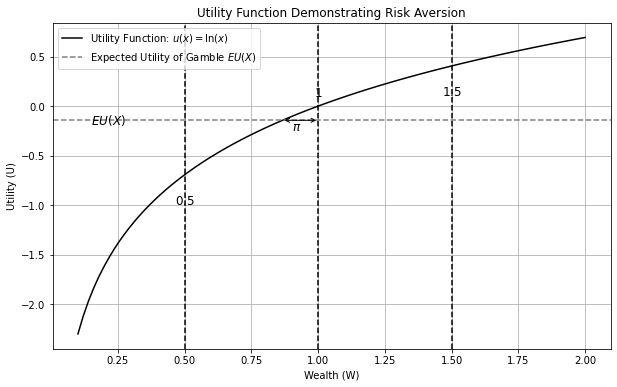

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Logarithmic utility function
def u_func(x):
    return np.log(x)

def x_func(u):
    return np.exp(u)

# Values for wealth and utility
x_vals = np.linspace(0.1, 2, 100)
u_x = u_func(x_vals)

# Gamble outcomes
x_gamble = [0.5, 1.5]  # Outcomes of the gamble
p_gamble = [0.5, 0.5]  # Probabilities

# Certain outcome
x_certain = 1

# Expected utility of the gamble
expected_utility = np.sum(np.array(p_gamble) * u_func(np.array(x_gamble)))

# Plotting the utility function
plt.figure(figsize=(10, 6))
plt.plot(x_vals, u_x, label=r'Utility Function: $u(x) = \ln(x)$', color='black')

# Plotting the certain outcome
plt.axvline(x=x_certain, color='black', linestyle='--')
plt.text(x_certain, u_func(x_certain) + 0.1, "$1$", horizontalalignment='center', fontsize=12)

# Plotting the gamble outcomes
plt.axvline(x=x_gamble[0], color='black', linestyle='--')
plt.axvline(x=x_gamble[1], color='black', linestyle='--')
plt.text(x_gamble[0], u_func(x_gamble[0]) - 0.3, "$0.5$", horizontalalignment='center', fontsize=12)
plt.text(x_gamble[1], u_func(x_gamble[1]) - 0.3, "$1.5$", horizontalalignment='center', fontsize=12)

# Plotting the expected utility
plt.axhline(y=expected_utility, color='gray', linestyle='--', label='Expected Utility of Gamble $EU(X)$')
plt.text(0.15, expected_utility, '$EU(X)$', verticalalignment='center', fontsize=12)

# Risk premium - distance between expected utility and utility of certain outcome
risk_premium = u_func(x_certain) - expected_utility
certainty_equivalence = x_func(expected_utility)
plt.annotate('', xy=(1, expected_utility), xytext=(certainty_equivalence, expected_utility),
             arrowprops=dict(facecolor='black', arrowstyle='<->'))
# Separate annotation for the label (π) without the arrow
plt.annotate(r'$\pi$', xy=(0.9, expected_utility -0.1), fontsize=12)

# Labels and title
plt.title('Utility Function Demonstrating Risk Aversion')
plt.xlabel('Wealth (W)')
plt.ylabel('Utility (U)')
plt.legend()
plt.grid(True)

# Forelesning 3: Porteføljeteori og matriser

Her bruker vi titlondatabasen:

In [2]:
from IPython.display import IFrame

# Embed the web page using an iframe
IFrame("https://titlon.uit.no/", width=700, height=200)

Vi bruker scriptmuligheten i Titlon for å hente data

In [4]:


import pandas as pd
#Query script for Microsoft SQL Server (MSSQL) client
import pymssql
con = pymssql.connect(host='titlon.uit.no', 
                    user="esi000@uit.no", 
                    password="VhWRI4OXiUE$xqic&!0AJ", 
                    database='OSE')  
crsr=con.cursor()
crsr.execute("""
	SELECT  * FROM [OSE].[dbo].[equity] 
	WHERE year([Date]) >= 2016
	ORDER BY [Name],[Date]
""")
r=crsr.fetchall()
df=pd.DataFrame(list(r), columns=[i[0] for i in crsr.description])
df



#YOU NEED TO BE CONNECTED TO YOUR INSTITUTION VIA VPN, OR BE AT THE INSTITUTION, FOR THIS CODE TO WORK

ModuleNotFoundError: No module named 'pymssql'

### Porteføljefronten

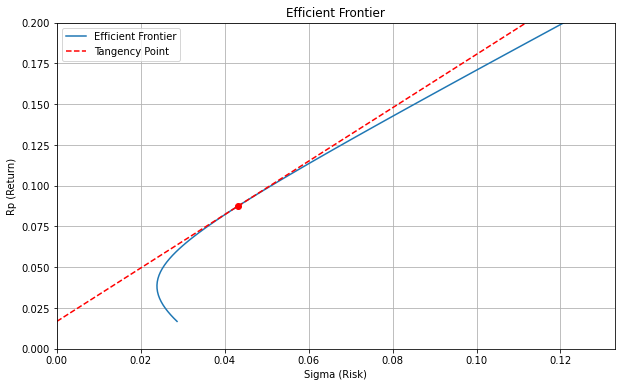

In [1]:
import functions
import pandas
import decomposition
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

MAX_AXIS = 0.2

df = pd.read_pickle('output/output.df')
# Defining risk free, cov matrix and mean vector
rf = np.exp(0.2/12)-1#df['NOWA_DayLnrate'].mean()

cov_matrix, means, df_month = functions.calc_moments(df)
R = decomposition.get_independent_portfolios(cov_matrix, 0.00001)
cov_matrix = R.T @ cov_matrix @ R
means = R.T @ means
# Create a vector of ones with the same length as the number of columns in the covariance matrix
ones = np.ones(cov_matrix.shape[0])

# Some useful scalar values
A = np.dot(ones.T, np.dot(np.linalg.inv(cov_matrix), ones))
B = np.dot(ones.T, np.dot(np.linalg.inv(cov_matrix), means-rf))
C = np.dot(means.T-rf, np.dot(np.linalg.inv(cov_matrix), means-rf))

#Creating plot
fig, ax = plt.subplots(figsize=(10, 6))

# Setting the range of rp values and sigma values
rp_values = np.linspace(0, MAX_AXIS, 100)


# Calculate and plot sigma values for each rp
sigma_values = 1/A + ((rp_values - abs(B)/A)**2) / (C - B**2/A)
ax.plot(sigma_values**0.5, rp_values+rf, label='Efficient Frontier')

# Calculate the tangency point and tangent
tangency_rp = C/abs(B)
tangency_sigma =  1/A + ((tangency_rp - abs(B)/A)**2) / (C - B**2/A)

ax.plot(tangency_sigma**0.5, tangency_rp + rf, 'ro')
sigma_range = np.linspace(0, np.max(sigma_values**0.5), 100)
ax.plot(sigma_range, rf + sigma_range*tangency_rp/tangency_sigma**0.5, color='r', linestyle='--', label='Tangency Point')
ax.set_xlim([0, np.max(sigma_values**0.5)])
ax.set_ylim([0, np.max(rp_values)])
ax.set_xlabel('Sigma (Risk)')
ax.set_ylabel('Rp (Return)')
ax.set_title('Efficient Frontier')
ax.grid(True)
ax.legend()

In [ ]:
np.array(cov_matrix*10000, dtype=int)



array([[   65,     0,     0, ...,     0,     0,     0],
       [    0,    92,     0, ...,     0,     0,     0],
       [    0,     0,  1331, ...,     0,     0,     0],
       ...,
       [    0,     0,     0, ..., 80328,     0,     0],
       [    0,     0,     0, ...,     0,  1870,     0],
       [    0,     0,     0, ...,     0,     0,   165]])

## Forelesning 4: Faktorer

In [2]:
import pandas as pd
#Query script for Microsoft SQL Server (MSSQL) client
import pymssql
con = pymssql.connect(host='titlon.uit.no', 
                    user="esi000@uit.no", 
                    password="ShidLZigibdq7NttTiiOl", 
                    database='OSE') 
crsr=con.cursor()
crsr.execute("""
	SELECT [Date],[SMB],[HML],[LIQ],[MOM]
  FROM [OSE].[dbo].[factors]
			 where year([Date]) >= 2016
""")
r=crsr.fetchall()
df_factors = pd.DataFrame(list(r), columns=[i[0] for i in crsr.description])
df_factors['Date'] = pd.to_datetime(df_factors['Date'])
df_factors.set_index('Date', inplace=True)
df_factors = df_factors.resample('ME').sum()
df_factors = df_factors.dropna()
factor_summary = pd.DataFrame({
	'mean': rf + df_factors[['SMB','HML', 'LIQ',	'MOM']].mean(),
	'std': df_factors[['SMB','HML', 'LIQ',	'MOM']].std()
})
factor_summary

ModuleNotFoundError: No module named 'pymssql'

C:\Users\esi000\AppData\Local\Temp\ipykernel_1956\1822984905.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.annotate(label, (factor_summary['std'][i], factor_summary['mean'][i]), fontsize=12)


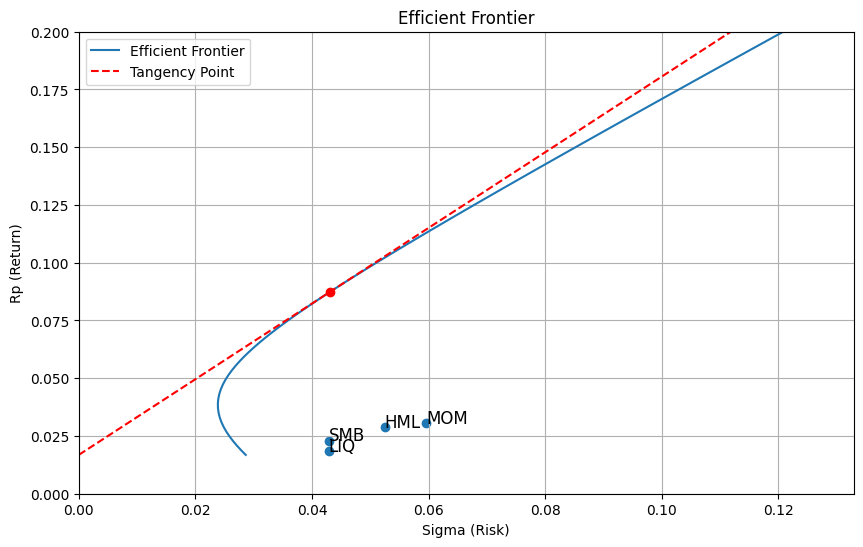

In [24]:

ax.scatter(factor_summary['std'], factor_summary['mean'])
for i, label in enumerate(factor_summary.index):
    ax.annotate(label, (factor_summary['std'][i], factor_summary['mean'][i]), fontsize=12)

fig

# Forelesning 5: VaR

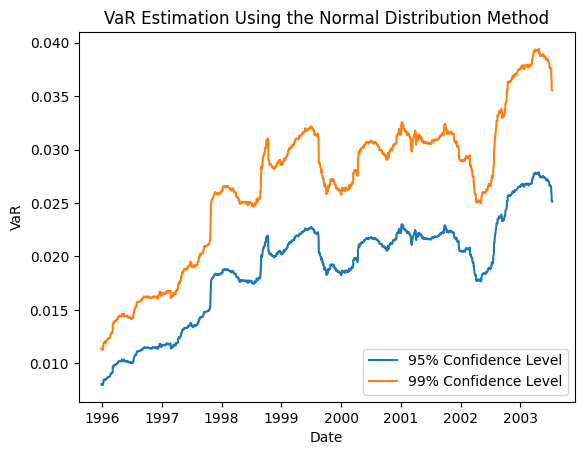

In [1]:
from datetime import  datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import VaR as var

SUBTRACT_MEAN = False

df = pd.concat((pd.read_excel("data/dateReturns.xlsx", header=None, names=['date']),
                pd.read_excel("data/Returns.xlsx",header=None, names=['return'])), axis=1)

estimation_win_size = 250
win_start = min(df[df['date']>='1995-1-1'].index)
win_start = min(df[df['date']>='1995-12-29'].index)

def normal_est(x,z,p,s):
  sigma = np.std(x, ddof=1)
  return - z[0]*sigma, - z[1]*sigma, sigma

normal95, normal99, sigma, dates, ret = var.est_var(normal_est, SUBTRACT_MEAN, win_start, df, estimation_win_size)


var.plot(plt, normal95, normal99, dates,
     'VaR Estimation Using the Normal Distribution Method')